# Simulation with Interrupted Poisson Process (3 super.) and No Queue

## Imports

In [1]:
%matplotlib inline
import scipy.stats as sts
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

from Simulation import Simulation

### Run the simulator with an interrupted poisson process

In [2]:
num_servers = 20
service_mean = 6
w1 = 8
w2 = 8
lmbda = 0.5
superpositions = 3
queue_size = 0

interarrival_exp = lambda num: sts.expon.rvs(size=num,scale=1./lmbda)
service_exp = lambda num: sts.expon.rvs(size=num,scale=service_mean)
stateGenOnToOff = lambda num: sts.expon.rvs(size=num,scale=w1)
stateGenOffToOn = lambda num: sts.expon.rvs(size=num,scale=w2)
stateGen = (stateGenOnToOff,stateGenOffToOn)

num_runs = 100
num_departs = 10000
blocks = np.zeros((num_runs,))
for run in range(num_runs):
    if (run+1) % 10 == 0:
        print("Run {} out of {}".format(run+1,num_runs))
    s = Simulation(num_servers=num_servers,interarrival=interarrival_exp,service=service_exp,
                   stateGen=stateGen,superpositions=superpositions,queue_size=queue_size)
    while s.num_departed < num_departs:
        s.advanceTime()
    blocks[run] = s.num_blocked/s.num_arrivals

Run 10 out of 100
Run 20 out of 100
Run 30 out of 100
Run 40 out of 100
Run 50 out of 100
Run 60 out of 100
Run 70 out of 100
Run 80 out of 100
Run 90 out of 100
Run 100 out of 100


### Results from above


Blocking prob. mean: 0.001400
Blocking prob. var: 6.529689e-07
Blocking prob. CI: [0.001239,0.001560]


Text(0.5,1,'Successive periods of Server Activity')

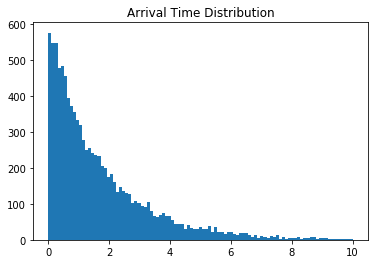

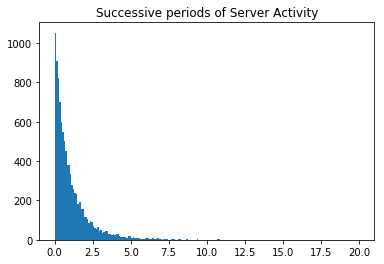

In [4]:
print("\nBlocking prob. mean: {0:.6f}".format(blocks.mean()))
print("Blocking prob. var: {0:e}".format(blocks.var(ddof=1)))
n = blocks.shape[0]
inner = (blocks.std(ddof=1)/np.sqrt(n))
alpha = 0.05
CI = [blocks.mean()+inner*sts.t.ppf(alpha/2,df=n-1),blocks.mean()+inner*sts.t.ppf(1-(alpha/2),df=n-1)]
print("Blocking prob. CI: [{0:.6f},{1:.6f}]".format(*CI))

probs= -1/2*np.log(np.random.rand(10000))/2
probs = probs-1/2*np.log(np.random.rand(10000))*2

plt.figure()
plt.hist(s.arrivalTimes,bins=np.linspace(0,10,100))
plt.title('Arrival Time Distribution')

serviceActivityTimes = np.array(s.serviceActivityTimes)
plt.figure()
plt.hist(serviceActivityTimes,bins=np.linspace(0,20,200))
plt.title('Successive periods of Server Activity')